In [1]:
from utils.molec_class_files import r14, r32, r50, r125, r134a, r143a, r170, r41, r23, r161, r152a, r152, r134, r143, r116
from utils import atom_type, opt_atom_types
import numpy as np
import unyt as u
import pandas as pd
from fffit.fffit.utils import values_real_to_scaled, values_scaled_to_real, variances_scaled_to_real, generate_lhs
from fffit.fffit.plot import plot_obj_contour
import os

2024-06-28 14:49:10.305961: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-28 14:49:10.349052: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 14:49:10.349096: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 14:49:10.350721: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-28 14:49:10.358369: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-28 14:49:10.359492: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [10]:
import scipy 
import os
repeats = 1
seed = 1
#Get obj from a set of parameters
at_class = 11
save_data = False
obj_choice = "ExpVal"
obj_choice_p = "ExpValPrior"
molec_names = ["R14", "R32", "R50", "R125", "R134a", "R143a", "R170"]
at_optimizer =  opt_atom_types.Opt_ATs(molec_names, at_class, repeats, seed, obj_choice_p)
# visual = opt_atom_types.Vis_Results(molec_data_dict, all_gp_dict, at_class, obj_choice)
# visual.check_GPs()
setup = opt_atom_types.Problem_Setup(molec_names, at_class, obj_choice)
all_molec_dir = setup.use_dir_name
all_df = pd.read_csv(all_molec_dir /"best_per_run.csv", header = 0)
sorted_df = all_df.sort_values(by='Min Obj', ascending = True).reset_index(drop = True)
first_param_name = setup.at_class.at_names[0] + "_min"
last_param_name = setup.at_class.at_names[-1] + "_min"
best_pref = all_df.loc[0, first_param_name:last_param_name].values
best_real= at_optimizer.values_pref_to_real(best_pref)
# best_real = generate_lhs(1, at_optimizer.at_class.at_bounds_nm_kjmol, at_optimizer.seed, labels = None)
obj = at_optimizer.calc_obj(best_real)
print(obj[0])

# #Get Jac and Hess info from a set of parameters
# dir_name = at_optimizer.make_results_dir(list(at_optimizer.molec_data_dict.keys()))
# save_path = os.path.join(dir_name, "best_set" + "_jac_approx.npy")
# hess = np.load(save_path)
# print(hess)
# jac = at_optimizer.approx_jac(best_real)
# hess = at_optimizer.approx_hess(best_real)
# print(scipy.linalg.norm(jac, ord = np.inf))
# print(jac)
# print(hess)
# eigval, eigvec = scipy.linalg.eig(hess)
# print(eigval)

/scratch365/mcarlozo/generalizedFF/Results/at_11/R14-R32-R50-R170-R125-R134a-R143a/ExpVal/best_per_run.csv
best_info:       Run  Iter      Min Obj  sigma_Cm_min  sigma_C1_min  sigma_C2_0_min  \
0     50   490  8917.121865      3.823961      3.399209        3.854654   
1     71   538  8918.358766      3.827549      3.397984        3.855499   
2    157   587  8918.410867      3.825338      3.397634        3.855525   
3     60   615  8918.437477      3.825774      3.397945        3.854526   
4    156   630  8918.584778      3.826194      3.398637        3.855615   
..   ...   ...          ...           ...           ...             ...   
195   70   208  9672.588431      3.827142      3.396242        3.852360   
196   12   147  9684.986241      3.830312      3.391409        3.850863   
197  191   190  9706.780385      3.830707      3.397159        3.851860   
198   95   156  9714.818106      3.832500      3.393837        3.852295   
199   20   125  9850.549130      3.823841      3.387793 

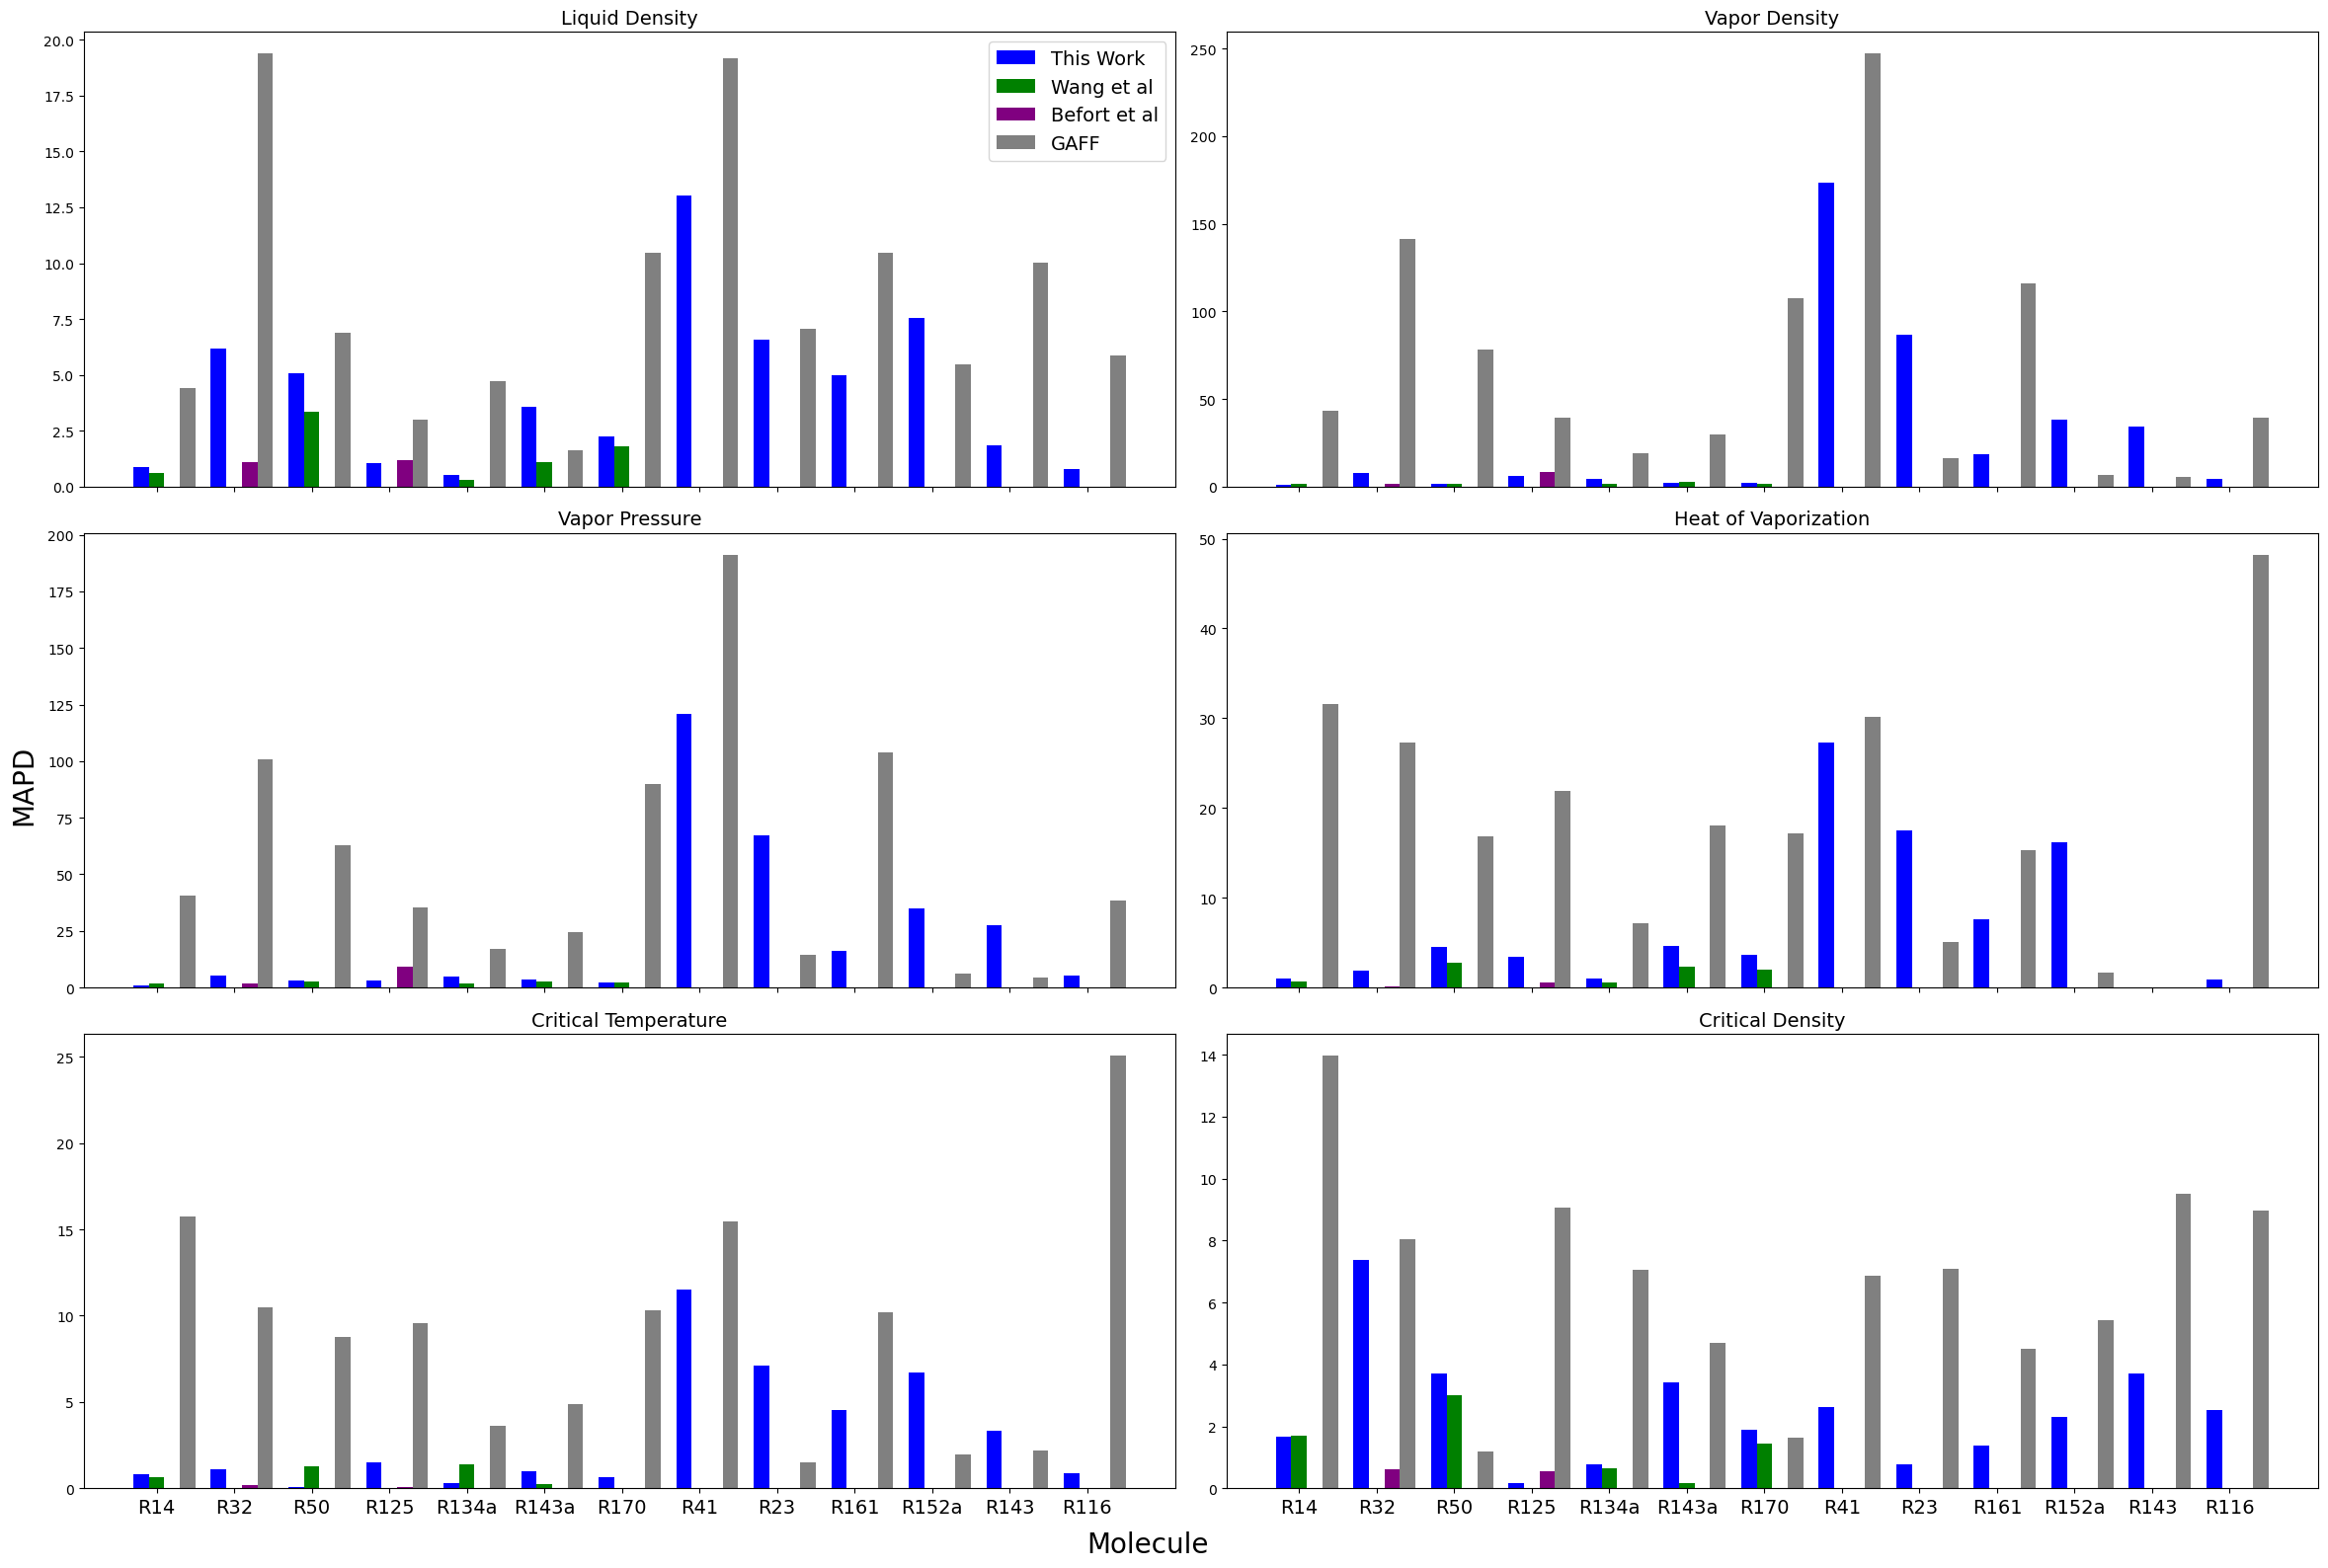

In [8]:
import matplotlib
import matplotlib.pyplot as plt

at_number = 11
molec_names = ["R14", "R32", "R50", "R125", "R134a", "R143a", "R170", "R41", "R23", "R161", "R152a",  "R143",  "R116"]

cols = ["mapd_liq_density",	"mapd_vap_density",	"mapd_Pvap", "mapd_Hvap", "mapd_Tc", "mapd_rhoc"]
names = ["Liquid Density", "Vapor Density", "Vapor Pressure", "Heat of Vaporization", "Critical Temperature", "Critical Density"]
#Load our results, Gaff results, and old result MAPD values
gaff_err = pd.read_csv('Results_MS/gaff_ff_ms_err.csv', header = 0, index_col ="molecule")
nw_ffo_err = pd.read_csv('Results_MS/Wang_FFO_err.csv', header = 0, index_col ="molecule")
bb_ffo_err = pd.read_csv('Results_MS/BBFF_err.csv', header = 0, index_col ="molecule")
optff_err = pd.read_csv('Results_MS/at_' + str(at_number) + '/opt_ff_ms_err.csv', header = 0, index_col ="molecule")

colors = ['blue', 'green', 'purple', 'gray']

# df_reordered = df.reindex(molec_dict.keys())
df1 = optff_err.reindex(molec_names)
df2 = nw_ffo_err.reindex(molec_names)
df3 = gaff_err.reindex(molec_names)
df4 = bb_ffo_err.reindex(molec_names)
fig, axs = plt.subplots(3, 2, figsize=(24, 16), sharex = True)
# Plot each column in a subplot
for ax, column, name in zip(axs.flatten(), cols, names):
    bar_width = 0.2
    indices = np.arange(len(molec_names))
    ax.bar(indices, df1[column], bar_width, label='This Work', color = 'blue')
    ax.bar(indices + bar_width, df2[column], bar_width, label='Wang et al', color = "green")
    ax.bar(indices + 2 * bar_width, df4[column], bar_width, label='Befort et al', color = "purple")
    ax.bar(indices + 3 * bar_width, df3[column], bar_width, label='GAFF', color = "grey")
    
    ax.set_ylim(0, max(max(df1[column]), max(df2[column]), max(df3[column]))*1.05)
    ax.set_title(name, fontsize = 14) 
    ax.set_xticks(indices + bar_width)
    ax.set_xticklabels(molec_names, fontsize=14)
    if name == "Liquid Density":
        ax.legend(loc = 'upper right', fontsize = 14)

# Adjust layout
fig.supxlabel('Molecule', fontsize = 20)
fig.supylabel("MAPD", fontsize = 20)

plt.tight_layout(rect=[0.01, 0.0, 1, 1])
# Show the plot
plt.show()

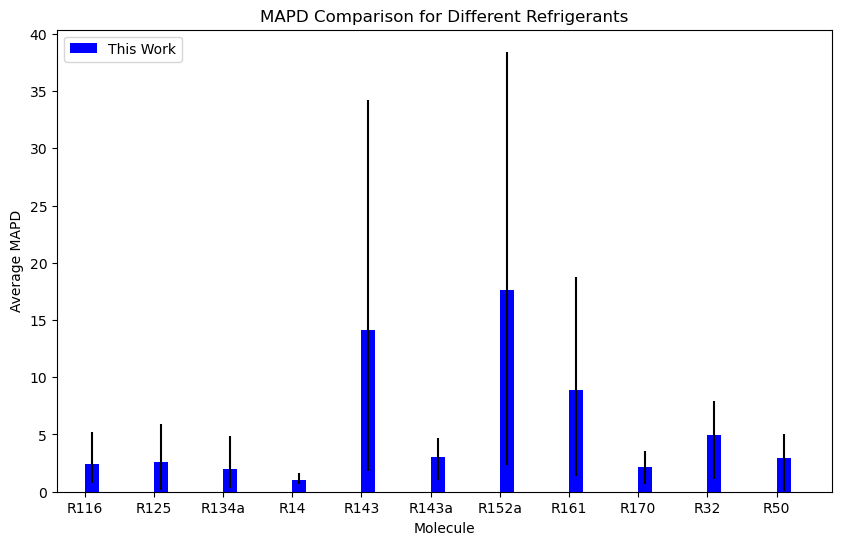

In [3]:
import matplotlib
import matplotlib.pyplot as plt

at_number = 11
cols = ["mapd_liq_density",	"mapd_vap_density",	"mapd_Pvap", "mapd_Hvap", "mapd_Tc", "mapd_rhoc"]
#Load our results, Gaff results, and old result MAPD values
gaff_err = pd.read_csv('Results_MS/gaff_ff_ms_err.csv', header = 0, index_col ="molecule")
nw_ffo_err = pd.read_csv('Results_MS/Wang_FFO_err.csv', header = 0, index_col ="molecule")
optff_err = pd.read_csv('Results_MS/at_' + str(at_number) + '/opt_ff_ms_err.csv', header = 0, index_col ="molecule")

# #Get Avg MAPD values for each molecule and each property + get min and max values
optff_avg = optff_err[cols].agg(['mean', 'min', 'max'], axis=1)
optff_avg.columns = ['MAPD', 'Min', 'Max']
gaff_avg = gaff_err[cols].agg(['mean', 'min', 'max'], axis=1)
gaff_avg.columns = ['MAPD', 'Min', 'Max']
nwffo_avg = nw_ffo_err[cols].agg(['mean', 'min', 'max'], axis=1)
nwffo_avg.columns = ['MAPD', 'Min', 'Max']

#Merge the dataframes
merged_df = pd.concat([optff_avg, gaff_avg, nwffo_avg], axis=1, keys=['This Work', 'GAFF', 'Wang et al.'])
merged_df.drop(["R41", "R23", "R152", "R134"], inplace = True)

# Plot the merged DataFrame
fig, ax = plt.subplots(figsize=(10, 6))

yerr_optff = [merged_df['This Work']['MAPD'] - merged_df['This Work']['Min'], merged_df['This Work']['Max'] - merged_df['This Work']['MAPD']]
# yerr_GAFF = [merged_df['GAFF']['MAPD'] - merged_df['GAFF']['Min'], merged_df['GAFF']['Max'] - merged_df['GAFF']['MAPD']]
# yerr_nwffo = [merged_df['Wang et al.']['MAPD'] - merged_df['Wang et al.']['Min'], merged_df['Wang et al.']['Max'] - merged_df['Wang et al.']['MAPD']]
merged_df['This Work']['MAPD'].plot(kind='bar', color='b', ax=ax, yerr =yerr_optff, position=0, width=0.2, label='This Work', rot = 0)
# merged_df['GAFF']['MAPD'].plot(kind='bar', color='g', ax=ax, yerr =yerr_GAFF, position=1.0, width=0.2, label='GAFF', rot = 0)
# merged_df['Wang et al.']['MAPD'].plot(kind='bar', color='r', ax=ax, yerr =yerr_nwffo, position=2.0, width=0.2, label='Wang et al.', rot = 0)

ax.set_title('MAPD Comparison for Different Refrigerants')
ax.set_xlabel('Molecule')
ax.set_xlim(-0.4, len(merged_df.index) - 0.2)
ax.set_ylabel('Average MAPD')
ax.legend(loc='upper left')

# Show the plot
plt.show()


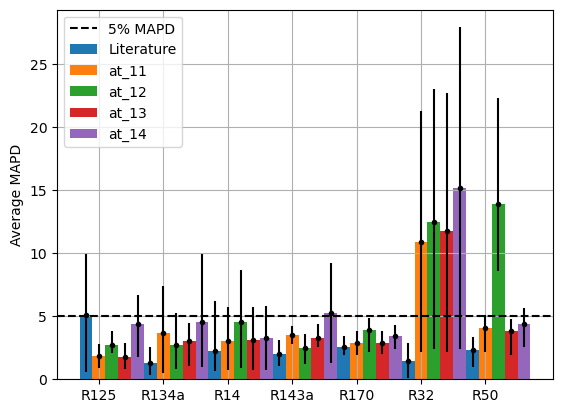

In [7]:
import matplotlib
import matplotlib.pyplot as plt

#setup
obj_choice = "ExpVal"
molec_names =["R14", "R32", "R50", "R125", "R134a", "R143a", "R170"]

#For each AT, get best MAPD list
at_list = [11,12,13,14]

x = np.arange(len(molec_names))  # the label locations
width = 0.2 #1/len(x+1)  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()
for at in at_list:
    setup = opt_atom_types.Problem_Setup(molec_names, at, obj_choice)
    df = pd.read_csv(setup.use_dir_name / "MAPD_best_set.csv", header = 0)

    if at == 11:
        litdf = df[df['Model'] == "Literature"]
        litdf = litdf.groupby('Molecule')['MAPD'].agg(['mean', 'min', 'max']).reset_index()
        litdf.columns = ['Molecule', 'Avg MAPD', 'Min MAPD', 'Max MAPD']
        offset = width * multiplier
        rects2 = ax.bar(x + offset, litdf["Avg MAPD"], width, label="Literature")
        maxy = litdf["Max MAPD"] - litdf["Avg MAPD"]
        miny = litdf["Avg MAPD"] - litdf["Min MAPD"]
        ax.errorbar(x + offset, litdf["Avg MAPD"], yerr=[miny, maxy], fmt=".k")
        multiplier += 1

    #Get only best opt values
    if isinstance(molec_names, str):
        molecule_str = molec_names
    elif len(molec_names) > 1 and isinstance(molec_names, (list,np.ndarray)):
        #Assure list in correct order
        desired_order = list(setup.all_train_molec_data.keys())
        molec_sort = sorted(molec_names, key=lambda x: desired_order.index(x))
        molecule_str = '-'.join(molec_sort)
    else:
        molecule_str = molec_names[0]

    filtered_df = df[df['Model'] == 'Opt ' + molecule_str]
    sorted_df = filtered_df.sort_values(by='MAPD', ascending = False).reset_index(drop = True)
    average_df = sorted_df.groupby('Molecule')['MAPD'].agg(['mean', 'min', 'max']).reset_index()
    average_df.columns = ['Molecule', 'Avg MAPD', 'Min MAPD', 'Max MAPD']
    offset = width * multiplier
    rects = ax.bar(x + offset, average_df["Avg MAPD"], width, label="at_" + str(at))
    maxy = average_df["Max MAPD"] - average_df["Avg MAPD"]
    miny = average_df["Avg MAPD"] - average_df["Min MAPD"]
    ax.errorbar(x + offset, average_df["Avg MAPD"],yerr=[miny, maxy], fmt=".k")
    # ax.bar_label(rects, padding=3)
    multiplier += 1
    

ax.axhline(y=5, label="5% MAPD", color = "black", linestyle = "--")
    
#Filter out non-full atscheme results
#Plot
# ax.set_xticks(x + width )
ax.set_xticks(x + width, list(average_df["Molecule"]))
ax.set_ylabel("Average MAPD")
ax.grid()
plt.legend(loc='upper left')
plt.show()